# 데이터 검토 및 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ad_campaign = pd.read_csv('KAG_conversion_data.csv')
ad_campaign.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [2]:
ad_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [3]:
ad_campaign.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [4]:
# 클릭보다 전환수가 많은 경우는 불가능하므로 오류로 판단하여 제거
ad_campaign = ad_campaign[ad_campaign['Total_Conversion'] <= ad_campaign['Clicks']]

# 마찬가지로 Approved_Conversion이 Total_Conversion보다 많은 경우는 불가능하므로 오류로 판단하여 제거
ad_campaign = ad_campaign[ad_campaign['Approved_Conversion'] <= ad_campaign['Total_Conversion']]

In [5]:
# fb_campaign_id의 유니크값 개수
ad_campaign['fb_campaign_id'].nunique()

537

In [6]:
# fb_campaign_id가 같으면 age, gender, interest가 같은것으로 보이므로, 확인해보자
grouped = ad_campaign.groupby('fb_campaign_id')
same_values = grouped['age', 'gender', 'interest'].apply(lambda x: x.nunique() == 1)

has_false = same_values.apply(any) == False
false = has_false[has_false].index.tolist()

C:\Users\333cu\AppData\Local\Temp\ipykernel_6636\2505806039.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  same_values = grouped['age', 'gender', 'interest'].apply(lambda x: x.nunique() == 1)


In [7]:
# interest의 유니크값 개수
ad_campaign['interest'].nunique()

40

In [8]:
# age의 유니크값 개수
ad_campaign['age'].nunique()

4

In [9]:
# gender의 유니크값 개수
ad_campaign['gender'].nunique()

2

In [10]:
# xyz_campaign_id의 유니크값 개수
ad_campaign['xyz_campaign_id'].nunique()

3

In [11]:
# xyz_campaign_id의 유니크값
ad_campaign['xyz_campaign_id'].unique()

array([ 916,  936, 1178], dtype=int64)

In [12]:
# xyz_campaign_id의 값이 1178, 936, 916인 경우 각각 X, Y, Z로 변경
ad_campaign['xyz_campaign_id'].replace({1178: 'X', 936: 'Y', 916: 'Z'}, inplace=True)
ad_campaign.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1,708749,Z,103917,30-34,M,16,17861,2,1.82,2,0
3,708815,Z,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,Z,103928,30-34,M,28,4133,1,1.29,1,1
6,708889,Z,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,Z,103941,30-34,M,16,10951,1,1.27,1,1


- 각 광고 캠페인별 타켓 성별, 나이, 관심사에 따라 fb_campaign_id가 부여되는 것으로 보인다.
- 추측컨데, 보여주는 시점 혹은 광고 계약 단가 등에 따라 다르게 취급되어 ad_id가 부여되는 것으로 보인다.
- 성별은 2개, 나이는 4구간, 관심사 코드는 40개로 구분되어 있다. (관심사 코드별 의미는 제시되어 있지 않고, 따로 조사해도 찾을 수 없었다.)

In [13]:
# Spent와 Clicks, Total_Conversion, Approved_Conversion의 상관관계
ad_campaign[['Spent', 'Clicks', 'Total_Conversion', 'Approved_Conversion']].corr()

,Spent,Clicks,Total_Conversion,Approved_Conversion
Spent,1.000000,0.992280,0.714074,0.585073
Clicks,0.992280,1.000000,0.681343,0.549171
Total_Conversion,0.714074,0.681343,1.000000,0.868000
Approved_Conversion,0.585073,0.549171,0.868000,1.000000


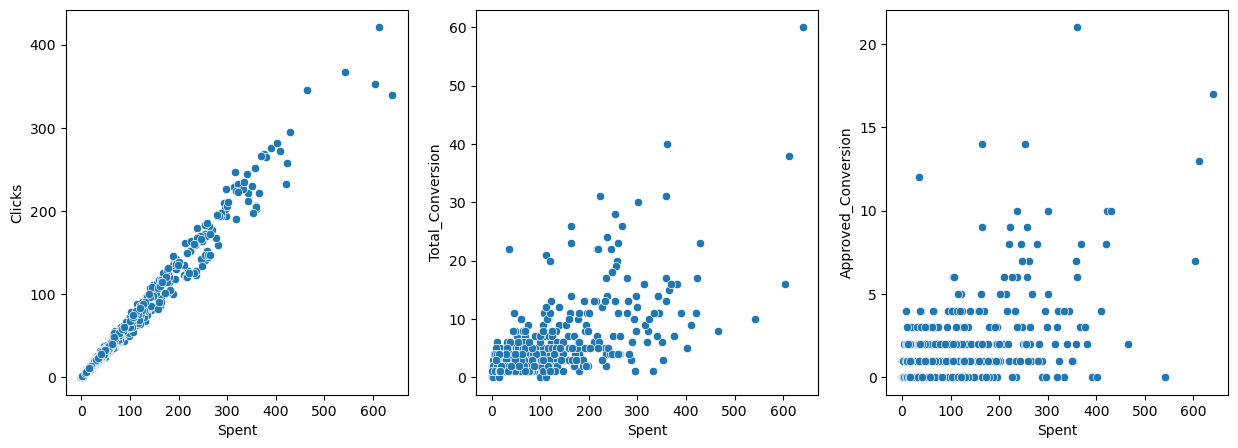

In [14]:
# Spent와 Clicks, Spent와 Total_Conversion, Spent와 Approved_Conversion의 산점도를 (1, 3)으로 출력
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x='Spent', y='Clicks', data=ad_campaign, ax=ax[0])
sns.scatterplot(x='Spent', y='Total_Conversion', data=ad_campaign, ax=ax[1])
sns.scatterplot(x='Spent', y='Approved_Conversion', data=ad_campaign, ax=ax[2])
plt.show()

Spent 값? 
- 광고에 대한 비용 계약은 CPM, CPC, CPA 등이 있다.
- 현재 데이터상, Clicks 값이 0일때, Spent 값이 0인 것으로 관찰된다. 그러므로 CPM은 아닌 것으로 보인다.
- 상관관계를 보면, Clicks와 Spent의 관계가 뚜렷하다. 그러므로 CPC 계약으로 보인다.
- 기입된 Spent 값은 해당 ad_id의 총 클릭 수에 대한 비용을 의미하므로 따로 CPC를 계산해야 한다.


In [15]:
# Clicks 값이 0인데, Spent 값이 0이 아닌 경우를 제거
ad_campaign = ad_campaign[~((ad_campaign['Clicks'] == 0) & (ad_campaign['Spent'] != 0))]

In [16]:
# Group by xyz_campaign_id and calculate sum of impression, clicks, spent, and total_conversion
grouped_campaign = ad_campaign.groupby('xyz_campaign_id').agg({'Impressions': 'sum', 'Clicks': 'sum', 'Spent': 'sum', 'Total_Conversion': 'sum'})

# Calculate CTR (Click-through Rate)
grouped_campaign['CTR(%)'] = grouped_campaign['Clicks'] / grouped_campaign['Impressions'] * 100

# Calculate CPC (Cost per Click)
grouped_campaign['CPC'] = grouped_campaign['Spent'] / grouped_campaign['Clicks']

# Calculate CR (Conversion Rate)
grouped_campaign['CR(%)'] = grouped_campaign['Total_Conversion'] / grouped_campaign['Clicks'] * 100

# Display the resulting dataframe
grouped_campaign

,Impressions,Clicks,Spent,Total_Conversion,CTR(%),CPC,CR(%)
xyz_campaign_id,,,,,,,
X,204539360,36061,55650.479959,2645,0.017630,1.543232,7.334794
Y,7756746,1977,2885.599999,340,0.025487,1.459585,17.197774
Z,436884,111,147.150001,35,0.025407,1.325676,31.531532


In [17]:
# xyz_campaign_id별 interest의 개수
ad_campaign.groupby('xyz_campaign_id')['interest'].nunique()

xyz_campaign_id
X    40
Y    24
Z    14
Name: interest, dtype: int64

In [18]:
# xyz_campaign_id가 Z, Y, X인 경우의 interest의 유니크값
ad_campaign[ad_campaign['xyz_campaign_id'] == 'Z']['interest'].unique()

array([16, 28, 15, 27, 20, 30, 29, 24, 21, 32, 65, 25, 10, 63],
      dtype=int64)

In [19]:
ad_campaign[ad_campaign['xyz_campaign_id'] == 'Y']['interest'].unique()

array([10, 15, 16, 20, 27, 28, 29, 26, 31, 64, 22, 36, 63,  2, 30, 18, 19,
       24, 21, 25, 65, 23,  7, 32], dtype=int64)

In [20]:
ad_campaign[ad_campaign['xyz_campaign_id'] == 'X']['interest'].unique()

array([ 10,  15,  16,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  36,  63,  64,  65,   2,   7,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 113, 108, 109, 112, 114, 104,
       106], dtype=int64)

In [21]:
# xyz_campaign_id별 age의 개수
ad_campaign.groupby('xyz_campaign_id')['age'].nunique()

xyz_campaign_id
X    4
Y    4
Z    4
Name: age, dtype: int64

interest에 대하여
- interest는 40개의 코드로 구분되어 있다.
- 나이대가 30,40대 각각 2개씩, 성별이 2개씩 그룹핑한 상황에서 interest의 값들이 들쭉날쭉하다. 같은 xyz캠페인 내에서도 어떤 그룹은 interest고유값이 18개, 어떤 그룹은 6개 등 편차가 매우 크며, 비슷한 중년 나이대에 성별도 같은데도 interest의 고유값 개수가 차이가 난다.
- 해당 데이터가 사전에 광고주가 타겟팅한 관심사인지, 아니면 해당 광고를 본 사람들 중 해당 관심사에 따라 집계된 것인지 알 수 없다. 즉, 광고주가 사전에 의도한 것인지 아닌지 본 데이터와 설명만으로는 판단하기 어렵다.

In [22]:
# 데이터 최종 정리
ad_campaign.drop(['ad_id', 'fb_campaign_id', 'interest'], axis=1, inplace=True)

# 데이터 저장
ad_campaign.to_csv('ad_campaign_cleaned.csv', index=False)